#### Eric Bochsler $$$$ Astronomy 425 $$$$ Problem Set 5

In [1]:
%pylab inline
from scipy.integrate import quad

Populating the interactive namespace from numpy and matplotlib


$1.$ $$$$
Values of $\Omega_{m}$ $\Omega_{r}$ and $\Omega_{\Lambda}$ that give rise to a Loitering universe and a Big Crunch universe. The Loitering universe will have a long period where the scale factor is approximately constant before growing again. The Big Crunch universe will have a scale factor that increases to a maximum and then decreases to zero. To complete this problem I used loops to try to find values of energy densities that would give rise to the a Loitering Universe and a Big Crunch Universe. To plot, values of t were determined for a series of given scale factors.

In [121]:
#As with previous homework, I am working on learning and switching to object-oriented programming.
#Will continue to work on this.
class Universe():
    '''A universe that is defined by energy densities of matter, radiation, and a cosmological constant.
    A universe also has a curvature that is defined as being positive or negative. A universe will have a scale factor
    that can be solved for redshift, or for time.
    
    Inputs:
        OmR: Float that represents energy density of radiation compared to critical density.
        OmM: Float that represents energy density of matter compared to critical density.
        OmL: Float that represents energy density of a cosmological constant compared to critical density.
        H: Float that represents Hubble's constant in km s^-1 Mpc^-1
    '''
    
    def _init_(self, OmR, OmM, OmL, H):
        self.OmR = OmR
        self.OmM = OmM
        self.OmL = OmL
        self.Om0 = OmR + OmM + OmL
        self.OmC = 1.0 - OmR - OmM - OmL
        self.H = H
        pass
    
    def Hz(self, H0, Omr, Omm, Oml, Om0, z):
        H = H0 * (3.15e16/3e19) #Hubble Constant for Age in Gyr (s to Gyr, Mpc to km)
        Hz = H*( Omr*(1+z)**(4.0) + Omm*(1+z)**(3.0) + Oml + (1-Om0)*(1+z)**(2.0) )**(1.0/2.0)
        return Hz
    
    def Ht(self, H0, Omr, Omm, Oml, Om0, scale):
        H = H0 * (3.15e16/3e19) #Hubble Constant for Age in Gyr (s to Gyr, Mpc to km)
        H = H*(Oml + (1.0 - Om0)*(scale**(-2.0)) + Omm*(scale**(-3.0)) +Omr*(scale**(-4.0))**(1.0/2.0))
        return H

In [133]:
def Ht(omr, omm, oml, H0, a):
    '''Finds H(t) for a given cosmology and scale factor that is time dependent.
   
    Inputs:
        omr: Float that represents energy density of radiation compared to critical density.
        omm: Float that represents energy density of matter compared to critical density.
        oml: Float that represents energy density of a cosmological constant compared to critical density.
        H0: Float that represents Hubble's constant in km s^-1 Mpc^-1.
    '''
    H = H0 * (3.15e16/3e19) #Hubble Constant for Age in Gyr (s to Gyr, Mpc to km)
    om0 = omr + omm + oml
    Ht = H * ((omr*(a**(-4.0)) + omm*(a**(-3.0)) + oml + (1 - om0)*(a**(-2.0)))**(1.0 / 2.0))
    return Ht
    
def findAgeFromScaleFactor(omm, omr, oml, a1, a2, H0):
        '''Finds the age of the universe for a number of different scale factors. Universe cosmology 
        is specified by the given values of omega and the Hubble's Constant.
        
        Inputs:
            omr: Float that represents energy density of radiation compared to critical density.
            omm: Float that represents energy density of matter compared to critical density.
            oml: Float that represents energy density of a cosmological constant compared to critical density.
            H0: Float that represents Hubble's constant in km s^-1 Mpc^-1.
            a1: Float representing smallest scale factor value for time to be evaluated.
            a2: Float representing largest scale factor value for time to be evaluated.
        '''
        
        H = H0 * (3.15e16/3e19) #Hubble Constant for Age in Gyr (s to Gyr, Mpc to km)
        scaleRange = linspace(a1, a2, 1000)
        x = lambda a: (a*Ht(omr, omm, oml, H0, a))**(-1.0)
        universeAge = asarray([quad(x, a1, i)[0] for i in scaleRange]) 
        return universeAge

# Loitering Universe

In [136]:
#Loitering Universe
OmR = 0
OmM = 0.3
OmL = 1.7134
H0  = 70 #km s^-1 Mpc^-1
a1 = 0.00001 #Very close to a = 0
a2 = 2.0
scaleValues = linspace(a1, a2, 1000)
age = findAgeFromScaleFactor(OmM, OmR, OmL, a1, a2, H0)

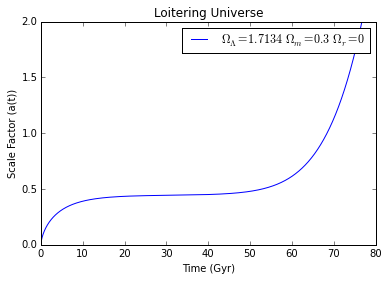

In [137]:
#Loitering Universe Plot
figure()
plot(age, scaleValues, label='$\Omega_{\Lambda}= 1.7134$ $\Omega_{m}= 0.3 $ $\Omega_{r}= 0$')
title('Loitering Universe')
xlabel('Time (Gyr)')
ylabel('Scale Factor (a(t))')
legend()
show()


# Big Crunch Universe

For the Big Crunch Universe, I found the omega matter value that gives rise to a universe where the scale factor decreases once it reaches a(t) = 3.0. This produced half of the plot, so the other half was made by mirroring the first.

In [272]:
#Big Crunch
OmR = 0
OmM = 1.50 #Universe collapse begins when scale factor is a(t) = 3.0
OmL = 0
H0  = 70 #km s^-1 Mpc^-1
a1 = 0.00001 #Very close to a = 0
a2 = 3.0 
scaleValues1 = linspace(a1, a2, 1000)
age1 = findAgeFromScaleFactor(OmM, OmR, OmL, a1, a2, H0)
print(age1[999])
ageAddition = age1[999] * 2.0

90.6710805528


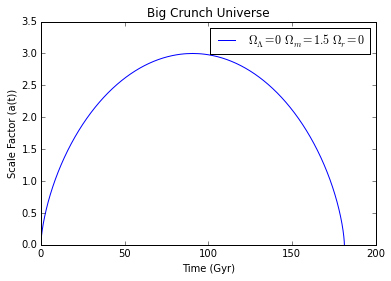

In [273]:
figure()
plot(age1, scaleValues1, color = 'b', label='$\Omega_{\Lambda}=0$ $\Omega_{m}=1.5$ $\Omega_{r}=0$')
plot(-age1 + ageAddition, scaleValues1, color = 'b')
title('Big Crunch Universe')
xlabel('Time (Gyr)')
ylabel('Scale Factor (a(t))')
ylim(0, 3.5)
legend()
show()


$2.$ $$$$
The expression for the Einstein radius from class: $$$$
$\theta_{E}=({4GM\over c^{2}}{D_{LS}\over D_{L}D_{S}})^{1/2}$ $$$$
$\theta_{E}^{2}=({4GM\over c^{2}}{D_{LS}\over D_{L}D_{S}})$ $$$$
$M_{E}= {\theta_{E}^{2}c^{2}D_{L}D_{S} \over 4GD_{LS}}$ $$$$
To find the mass of the isothermal sphere within the Einstein radius, the density of the sphere must be integrated over the volume. $$$$
$\rho(r)= {\sigma_{v}^{2} \over 2 \pi Gr^{2}}$ $$$$
$M_{E}=\int\rho(r)dV=\int_{0}^{2\pi}\int_{0}^{\pi}\int_{0}^{R}{\sigma_{v}^{2} \over 2 \pi Gr^{2}}r^{2}cos\theta drd\theta d\phi=4\pi\int_{0}^{R}{\sigma_{v}^{2} \over 2 \pi G}dr$ $$$$
$M_{E}(R)=2{\sigma_{v}^{2}R \over G}$ $$$$
The mass of the isothermal sphere within the Einstein radius R can be equated to the expression for mass found from the equation for the Einstein radius $\theta_{E}.$ $$$$
$M_{E}= {\theta_{E}^{2}c^{2}D_{L}D_{S} \over 4GD_{LS}}=2{\sigma_{v}^{2}R \over G}$ $$$$
The expression is solved for $\sigma_{v}^{2}$. $$$$
$\sigma_{v}^{2}={\theta_{E}^{2}c^{2}D_{L}D_{S} \over 8RD_{LS}}$ $$$$
$\sigma_{v}^{2}={\theta_{E}^{2}c^{2}D_{S} \over 8D_{LS}}{D_{L}\over R}$ $$$$
$\sigma_{v}=({\theta_{E}^{2}c^{2}D_{S} \over 8D_{LS}}{D_{L}\over R})^{1/2}$ $$$$
${R\over D_{L}}=tan\theta_{E}$ which can be approximated as $\theta_{E}$ by small angle approximation. $$$$
$\sigma_{v}=({\theta_{E}c^{2}D_{S} \over 8D_{LS}})^{1/2}$ $$$$
$\sigma_{v}={c\over \sqrt{8}}({\theta_{E}D_{S} \over D_{LS}})^{1/2}$ $$$$
$\sigma_{v} \approx 10^{3}kms^{-1}({\theta \over 28"}{D_{S} \over D_{LS}})^{1/2}$ $$$$